In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

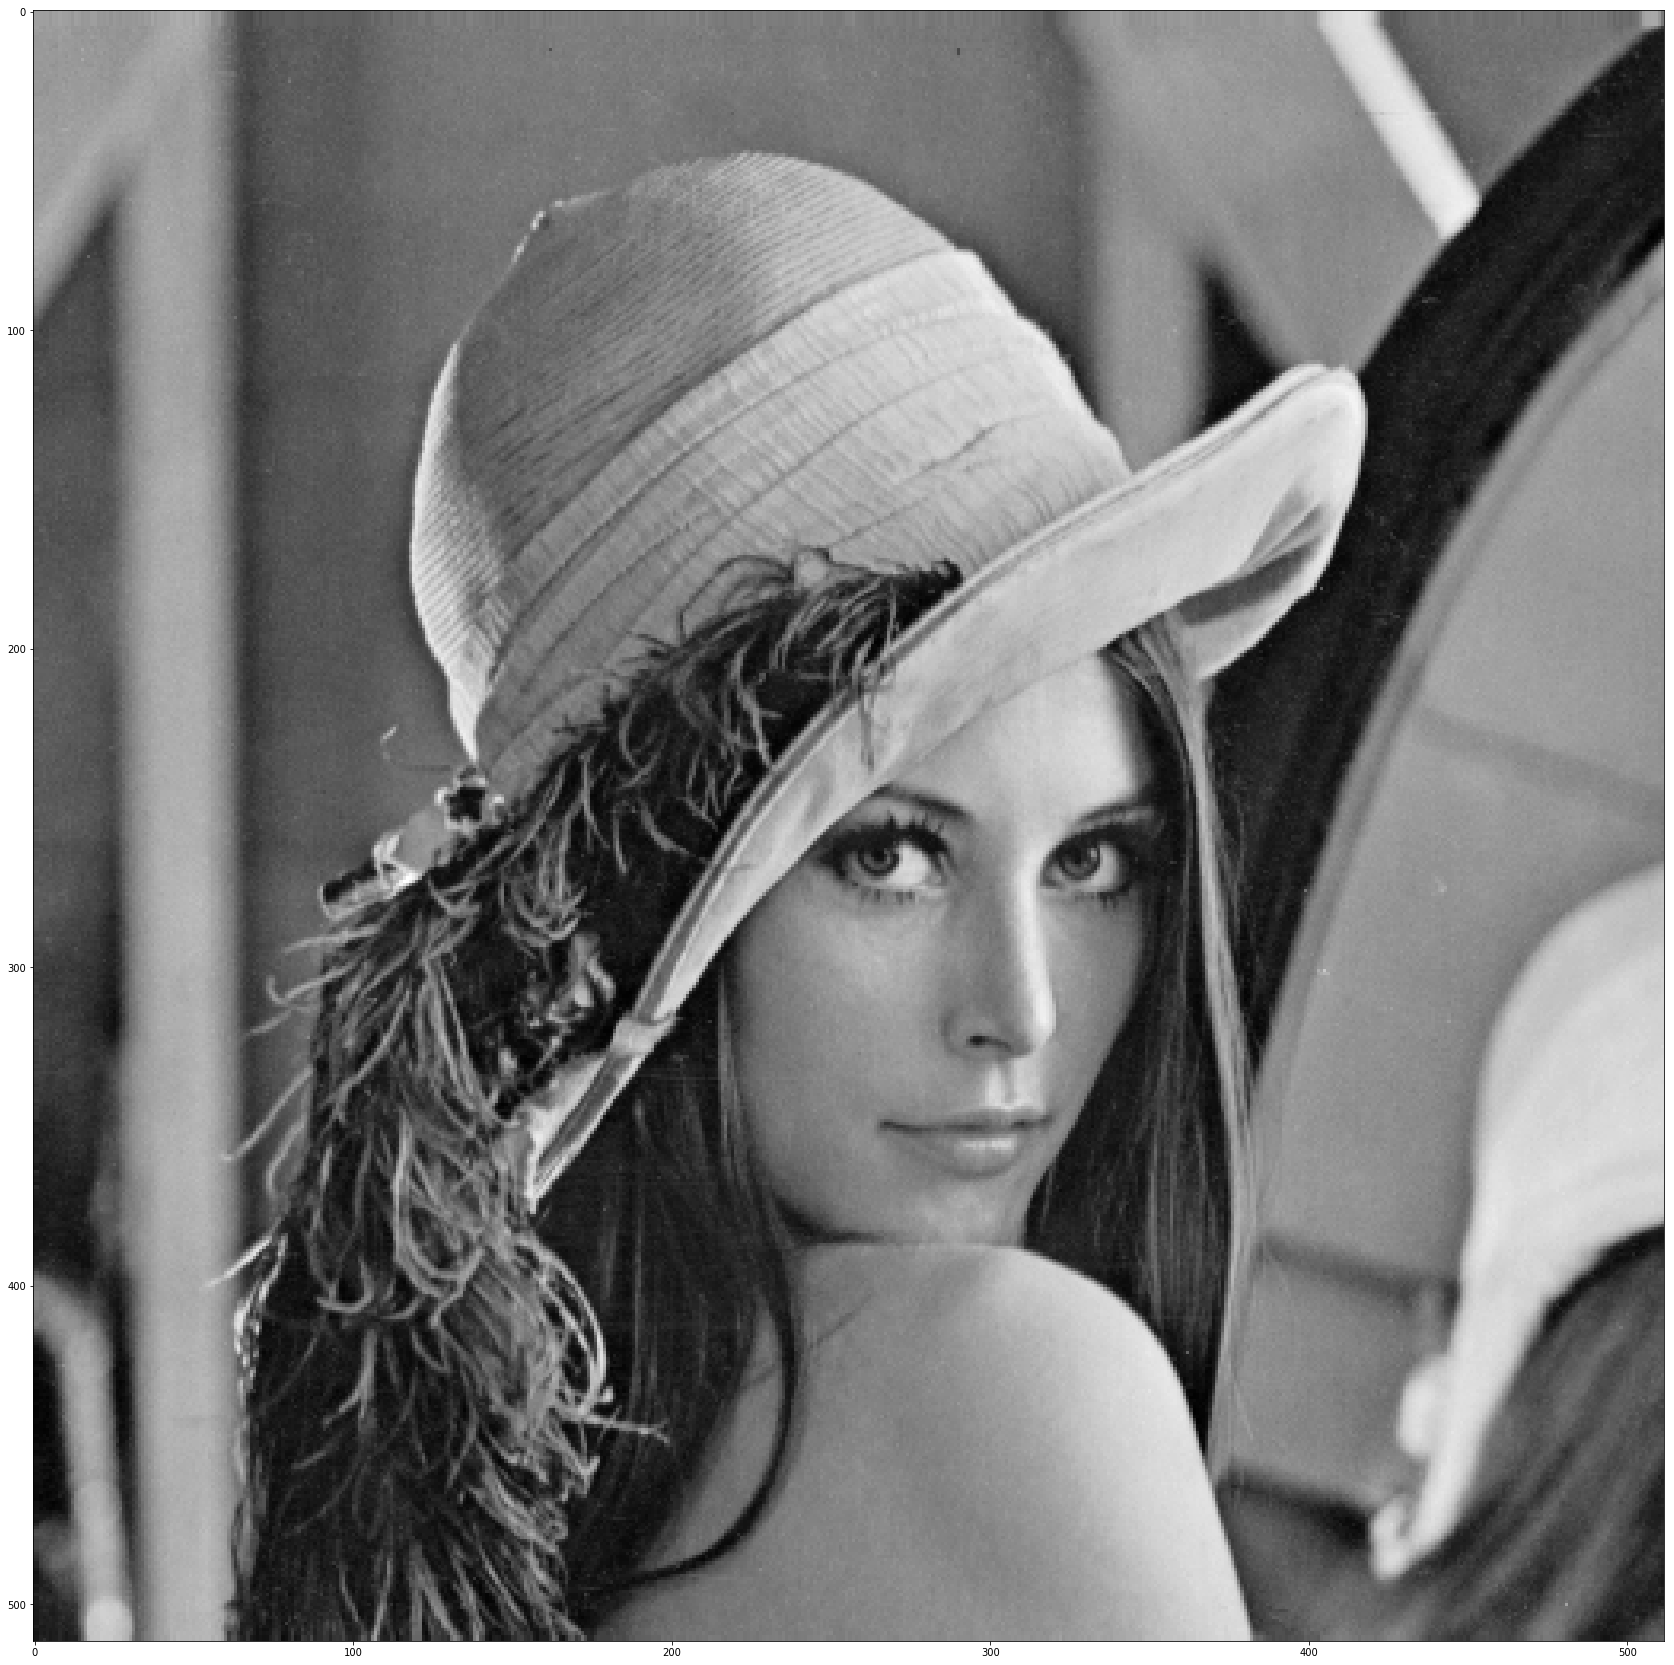

In [3]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

In [4]:
# Calculamos la DWT de la imagen original
wavelet = 'rbio1.1'
#wavelet = 'rbio3.5'
#wavelet = 'db5'
#wavelet = 'db25'
#wavelet = 'rbio6.8'
L, H = pywt.dwt2(Y, wavelet, 'per')

In [5]:
zero = np.zeros((L.shape[0], L.shape[1]))
L_big = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')

In [11]:
from medpy.filter.smoothing import anisotropic_diffusion
tmp = L_big
for i in range(100):
    print(i, end=' ')
    tmp = tmp + np.random.normal(-10, 10, tmp.shape)
    L_big_filtered = anisotropic_diffusion(tmp, niter=10)
    tmp = L_big_filtered

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

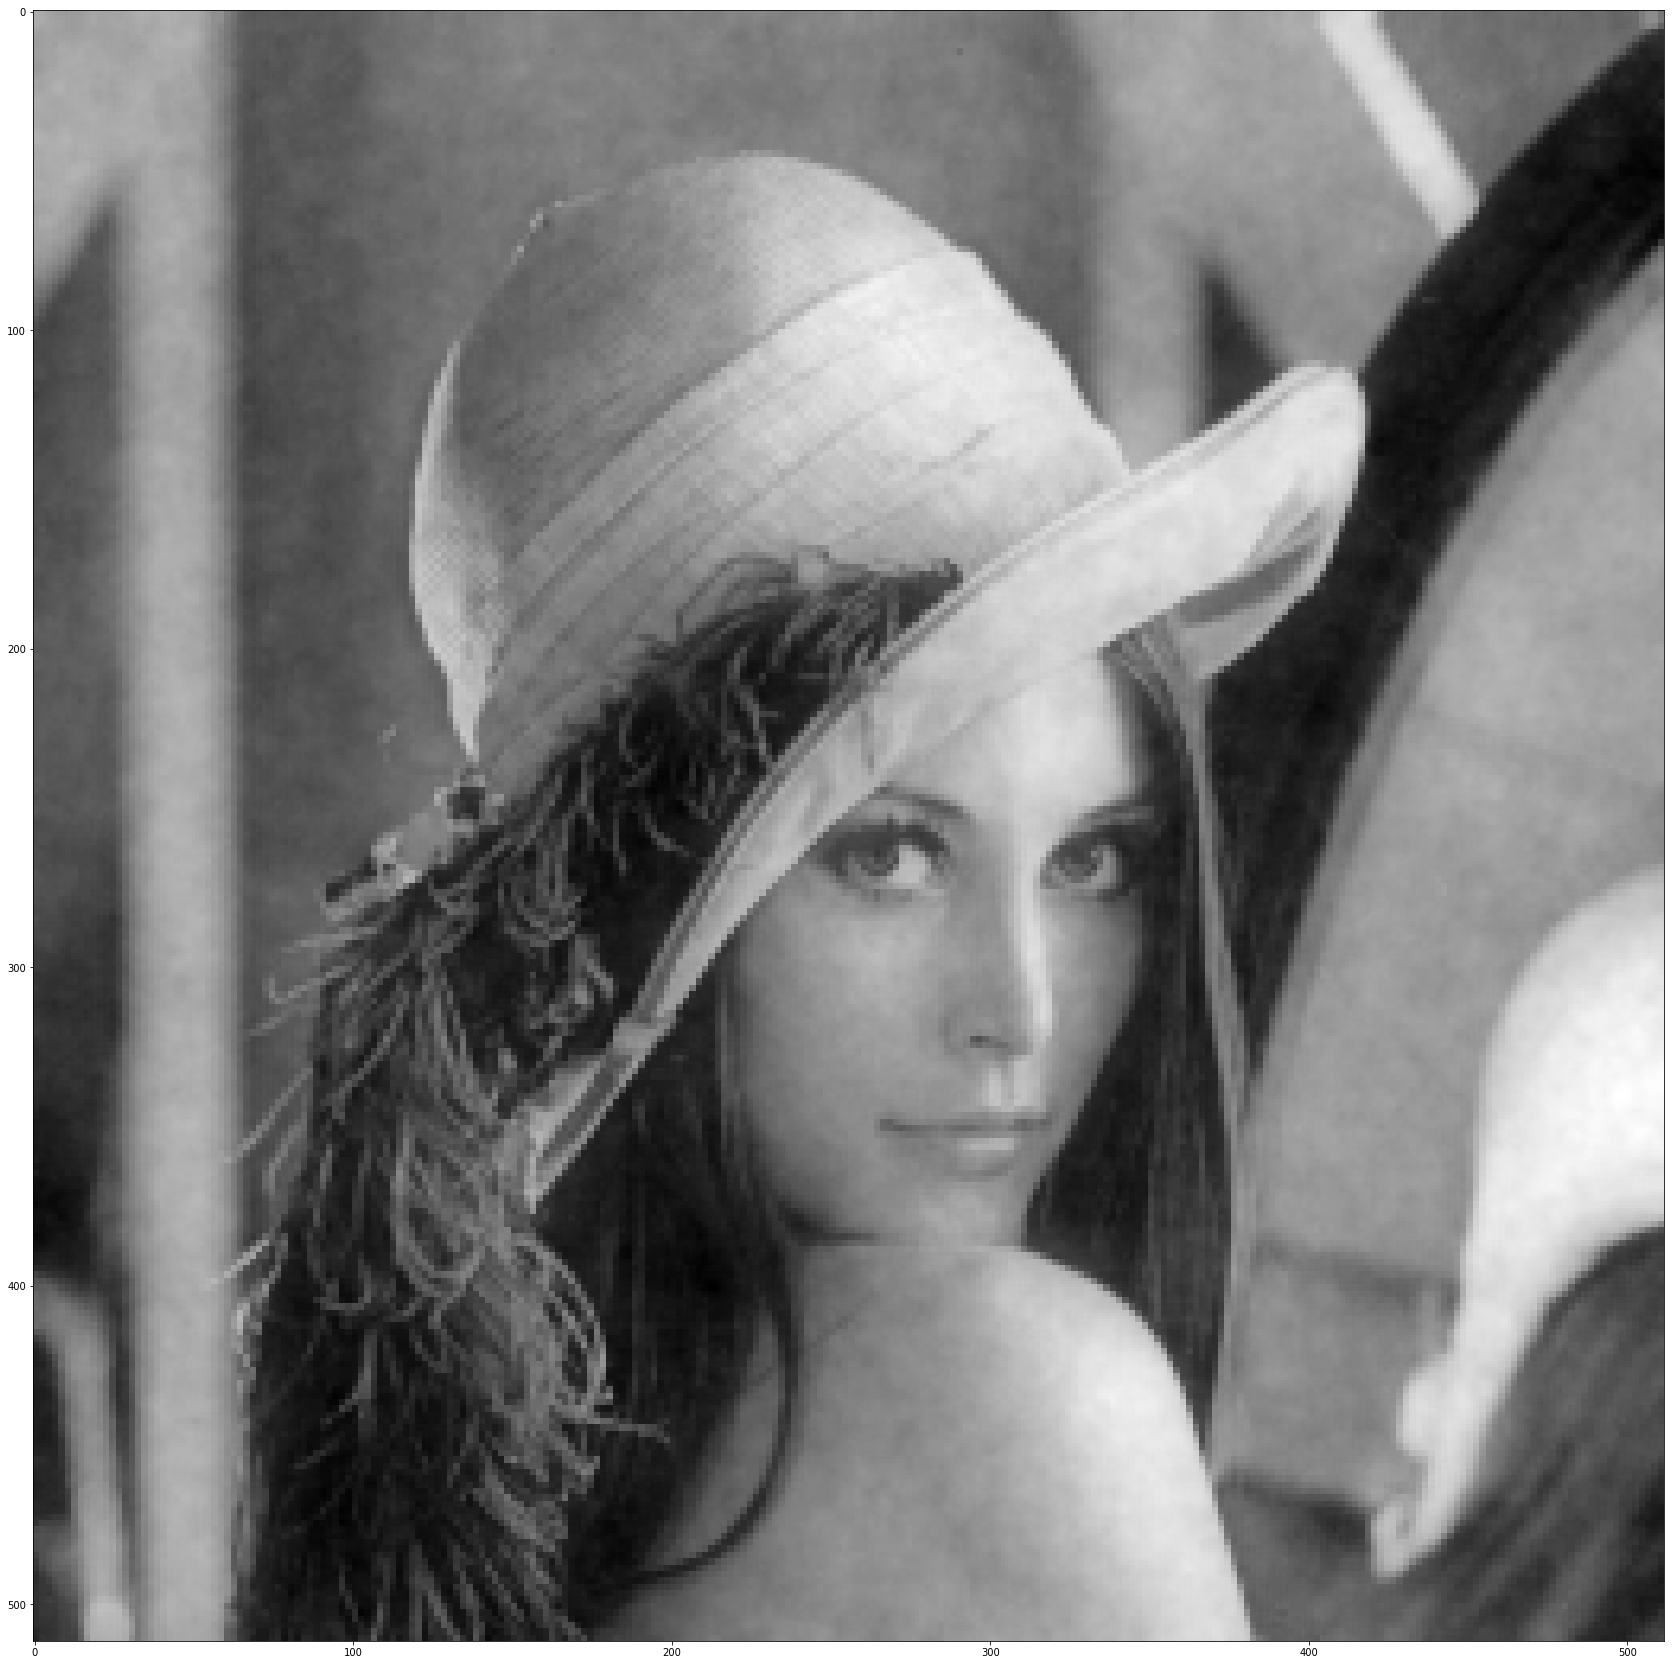

In [12]:
reconstruction_without_H = L_big + L_big_filtered
show(reconstruction_without_H)

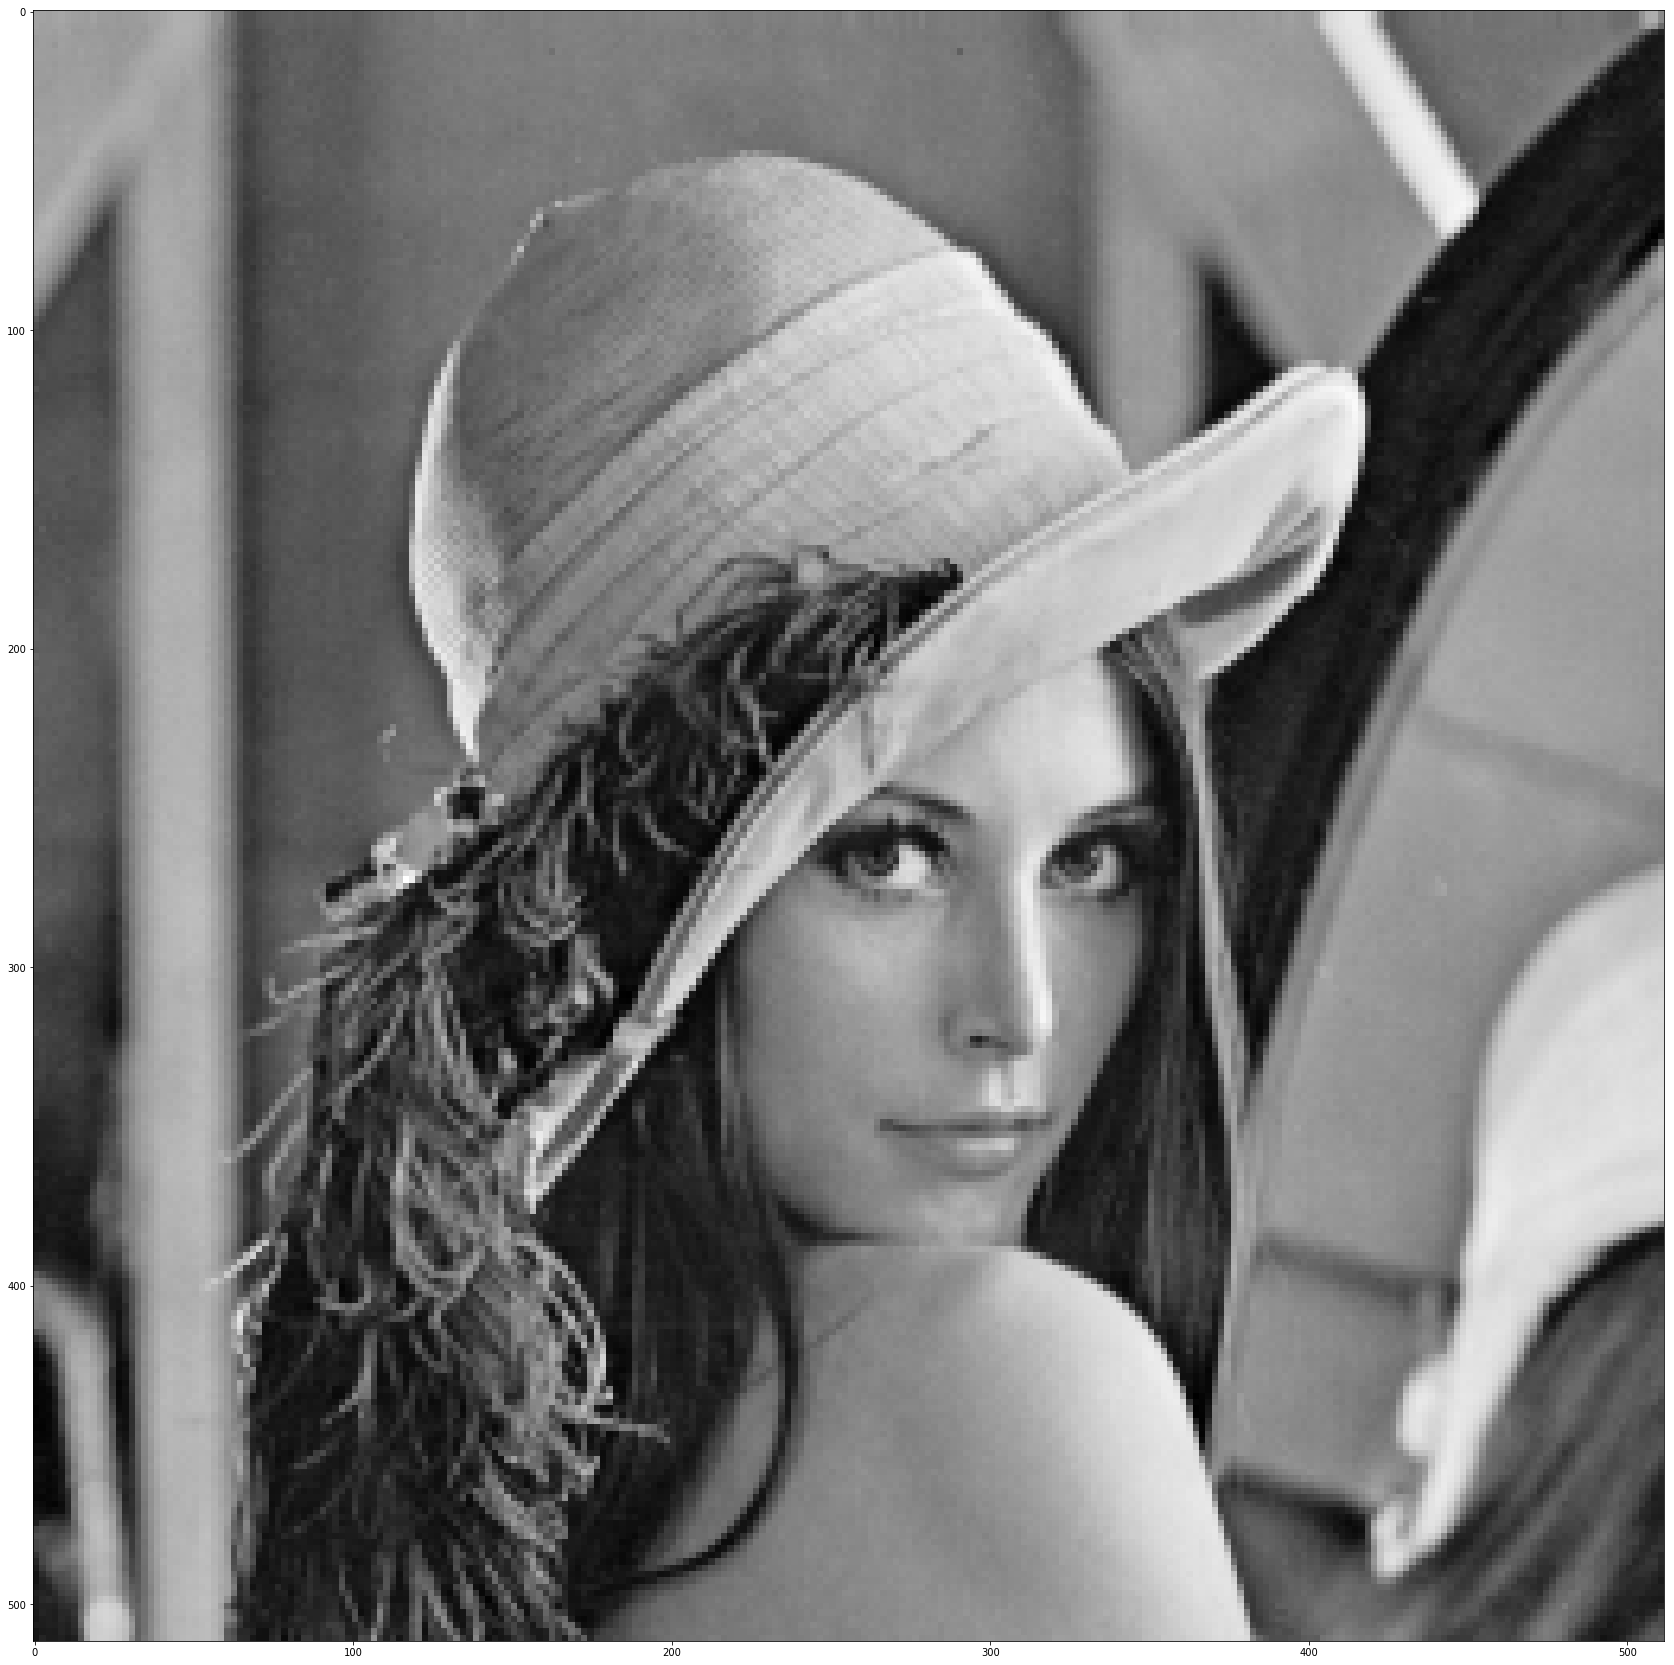

In [8]:
show(L_big)